<a href="https://colab.research.google.com/github/asanc23/DC_Crash/blob/main/DC_Crash_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries and importing CSV data


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab.data_table import DataTable
DataTable.max_columns = 50
from google.colab import drive
drive.mount('/content/drive')

DC_Crash= '/content/drive/MyDrive/Colab Notebooks/DC Crashes/Crashes_in_DC.csv'
df= pd.read_csv(DC_Crash)

Mounted at /content/drive


<ipython-input-1-05ed7bb1da60>:12: DtypeWarning: Columns (0,1,2,4,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(DC_Crash)


# Cleaning the data

In [ ]:
#dropping unused columns
df2= df.drop(columns= ['MPDLONGITUDE','MPDLATITUDE','X', 'Y','CCN', 'XCOORD', 'YCOORD', 'MAR_SCORE', 'LOCATIONERROR', 'LASTUPDATEDATE', 'MPDGEOY', 'MPDGEOX', 'MAR_ID', 'MEASURE', 'OFFSET', 'STREETSEGID', 'ROUTEID', 'NEARESTINTROUTEID', 'NEARESTINTSTREETNAME', 'EVENTID', 'ROADWAYSEGID', 'FROMDATE'])

#dropping nans
df3= df2.dropna()

#adding time column, removing time from REPORTDATE, and adding YEAR column
df3['REPORTTIME'] = df3.REPORTDATE.str[11:]
df3['REPORTDATE'] = df3['REPORTDATE'].str[:11]
df3['YEAR']= df3['REPORTDATE'].str[:4].astype(int)

df3= df3.query('`YEAR` >= 2013')

#saving
df3.to_csv("DC_Crash_CleanedData.csv")

I first began dropping columns that didn't serve much value such as many of the indentification numbers, mainly because I won't be searching up individual case IDs. I then dropped all null values as it would throw off any calculations I make. Next I filtered and formated the date and time columns as the dataset had entries dating as far back as 1975 but were not consistent. For that reason I decided to filter it to the past 10 years.

# Understanding the Data


In [ ]:
print(f'Number of Reported Accidents: {len(df3)}')

Number of Reported Accidents: 207015


In [ ]:
#count of how many vehicles were involved

veh_counts= pd.value_counts(df3['TOTAL_VEHICLES'])
vehresult = [index * value for index, value in veh_counts.items()]

#count of how many bikes were involved

bike_counts= pd.value_counts(df3['TOTAL_BICYCLES'])
bikeresult = [index * value for index, value in bike_counts.items()]

#count of how many pedestrians were involved

ped_counts= pd.value_counts(df3['TOTAL_PEDESTRIANS'])
pedresult = [index * value for index, value in ped_counts.items()]

#count of how many taxis were involved

taxi_counts= pd.value_counts(df3['TOTAL_TAXIS'])
taxiresult = [index * value for index, value in taxi_counts.items()]

#count of how many Government vehicles were involved

gov_counts= pd.value_counts(df3['TOTAL_GOVERNMENT'])
govresult = [index * value for index, value in gov_counts.items()]

In [ ]:
print(f'Total Number of accidents: {len(df3)}')
print(f'Total Reported Vehicles: {sum(vehresult):.0f}')
print(f'Avg Vehicles per Accident: {round(sum(vehresult)/len(df3),2)}')
print(f'\nTotal Reported Bicycles: {sum(bikeresult):.0f}')
print(f'\nTotal Reported Pedestrians: {sum(pedresult):.0f}')
print(f'\nTotal Reported Taxis: {sum(taxiresult):.0f}')
print(f'\nTotal Reported Government: {sum(govresult):.0f}')

Total Number of accidents: 207015
Total Reported Vehicles: 408074
Avg Vehicles per Accident: 1.97

Total Reported Bicycles: 4466

Total Reported Pedestrians: 9874

Total Reported Taxis: 11001

Total Reported Government: 23490


In [ ]:
speed_counts= pd.value_counts(df3['SPEEDING_INVOLVED'])
speedresult = [index * value for index, value in speed_counts.items()]
print(f'Number of accidents where speeding was involved: {sum(speedresult):.0f}')

Number of accidents where speeding was involved: 3531


In [ ]:
#count of impaired drivers
impdriv_counts= pd.value_counts(df3['DRIVERSIMPAIRED'])
impdrivresult = [index * value for index, value in impdriv_counts.items()]

print(f'\nTotal Impaired drivers : {sum(impdrivresult):.0f}')



Total Impaired drivers : 3764


In [ ]:
#injuries by ward
(df3
 .groupby('WARD')
 .agg({'MAJORINJURIES_BICYCLIST': 'sum' ,'MINORINJURIES_BICYCLIST': 'sum', 'MAJORINJURIES_DRIVER': 'sum'  , 'MINORINJURIES_DRIVER': 'sum' , 'MAJORINJURIES_PEDESTRIAN': 'sum', 'MINORINJURIES_PEDESTRIAN': 'sum'}).reset_index()
 )[1:]

,WARD,MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN
1,Ward 1,52.0,513.0,739.0,2214.0,185.0,691.0
2,Ward 2,120.0,904.0,1459.0,4334.0,347.0,1294.0
3,Ward 3,21.0,147.0,451.0,1748.0,110.0,322.0
4,Ward 4,27.0,220.0,767.0,3497.0,164.0,519.0
5,Ward 5,48.0,317.0,1441.0,6574.0,249.0,792.0
6,Ward 6,62.0,464.0,1106.0,4413.0,235.0,837.0
7,Ward 7,17.0,118.0,1370.0,6413.0,251.0,584.0
8,Ward 8,11.0,86.0,931.0,5037.0,237.0,712.0


# Data Visualizations

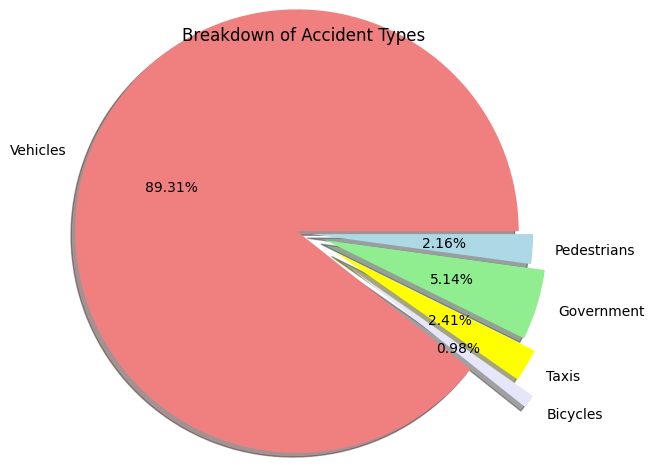

In [ ]:
acci_type= [sum(vehresult), sum(bikeresult), sum(taxiresult), sum(govresult),sum(pedresult) ]
label_list= ['Vehicles','Bicycles','Taxis','Government','Pedestrians']
color_list= ('lightcoral','lavender', 'yellow', 'lightgreen', 'lightblue')
plt.title('Breakdown of Accident Types',loc= 'center')
plt.pie(acci_type,labels= label_list, radius= 1.5, colors= color_list, shadow= 'True', autopct='%1.2f%%', explode=(.05, .4, .25, .15, .05))
plt.show()

In this graph, I decided to show the breakdown of the different types of vehicle categories involved. I decided on a pie chart because it would show the proportions of each category. As we can see the most common is regular vehicles. I was surprised that next was government but it makes sense since there is such a large number of governmental vehicles in the Washington D.C.

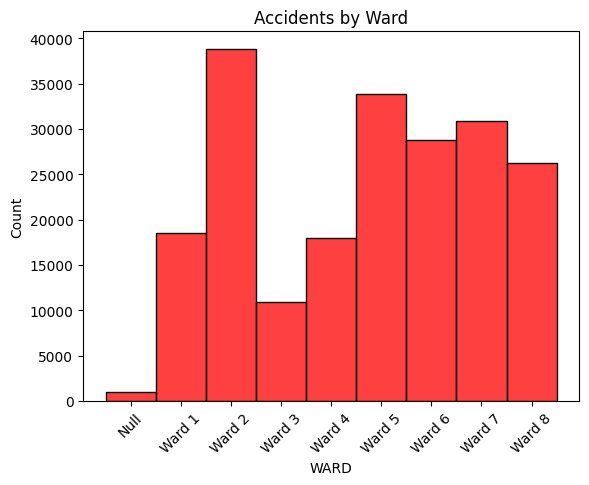

In [ ]:
plt.xticks(rotation=45)
plt.title('Accidents by Ward',loc= 'center')
sns.histplot(data= df3.sort_values(by='WARD'),
             x='WARD',
             color= 'red');

Next, I wanted to visualize the distribution of accidents across all wards. I then wanted to see what was causing ward 2 to have significantly more accidents than the rest. So I searched up the populations of each ward from the 2020 census. (https://planning.dc.gov/sites/default/files/dc/sites/op/publication/attachments/Map%202%20-%202020%20Census%20Population%20by%20Census%20Tract%20with%20Ward%20Table.pdf)

When I looked at the table it surprised me that almost all wards fell within a relative range but what made me realize the answer to my question was the location, ward 2 includes dowtown, georgetown, and so many areas that create traffic.


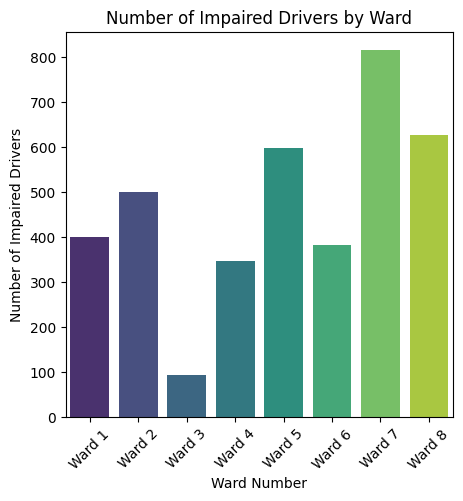

In [ ]:
impaired_by_ward = df3.groupby('WARD')['DRIVERSIMPAIRED'].sum()[1:]


plt.figure(figsize=(5, 5))
plt.xticks(rotation=45)
sns.barplot(x=impaired_by_ward.index,
            y=impaired_by_ward.values,
            palette='viridis')
plt.xlabel('Ward Number')
plt.ylabel('Number of Impaired Drivers')
plt.title('Number of Impaired Drivers by Ward')
plt.show()